In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import feature_13_generation as f13
#library to reload
import importlib
importlib.reload(f13)

<module 'feature_13_generation' from 'd:\\ADA\\ada-2023-project-adamants\\p3_code\\feature_13_generation.py'>

In [2]:
DATA_FOLDER = "../data/"
PATHS_AND_GRAPH = DATA_FOLDER + "wikispeedia_paths-and-graph/"
PATHS_FINISHED = PATHS_AND_GRAPH + "paths_finished.tsv"
PATHS_UNFINISHED = PATHS_AND_GRAPH + "paths_unfinished.tsv"

In [34]:
paths_finished = pd.read_csv(
    PATHS_FINISHED,
    sep="\t",
    header=None,
    names=["hashedIpAddress", "timestamp", "durationInSec", "path", "rating"],
    encoding="utf-8",
    skiprows=16,
).copy(deep=True)
paths_finished["timestamp"] = pd.to_datetime(paths_finished["timestamp"], unit="s")

In [35]:
paths_unfinished = pd.read_csv(
    PATHS_UNFINISHED,
    sep="\t",
    header=None,
    names=["hashedIpAddress", "timestamp", "durationInSec", "path", "target", "type"],
    encoding="utf-8",
    skiprows=17,
).copy(deep=True)
paths_unfinished["timestamp"] = pd.to_datetime(paths_unfinished["timestamp"], unit="s")

In [20]:
paths_finished = f13.add_number_of_backtracks(paths_finished)
paths_unfinished = f13.add_number_of_backtracks(paths_unfinished)

d:\ADA\ada-2023-project-adamants\p3_code\feature_13_generation.py:18: UserWarning: The dataframe already contains a column named backtrack
  return df
d:\ADA\ada-2023-project-adamants\p3_code\feature_13_generation.py:18: UserWarning: The dataframe already contains a column named backtrack
  return df


d:\applications\miniconda3\envs\ada\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
d:\applications\miniconda3\envs\ada\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


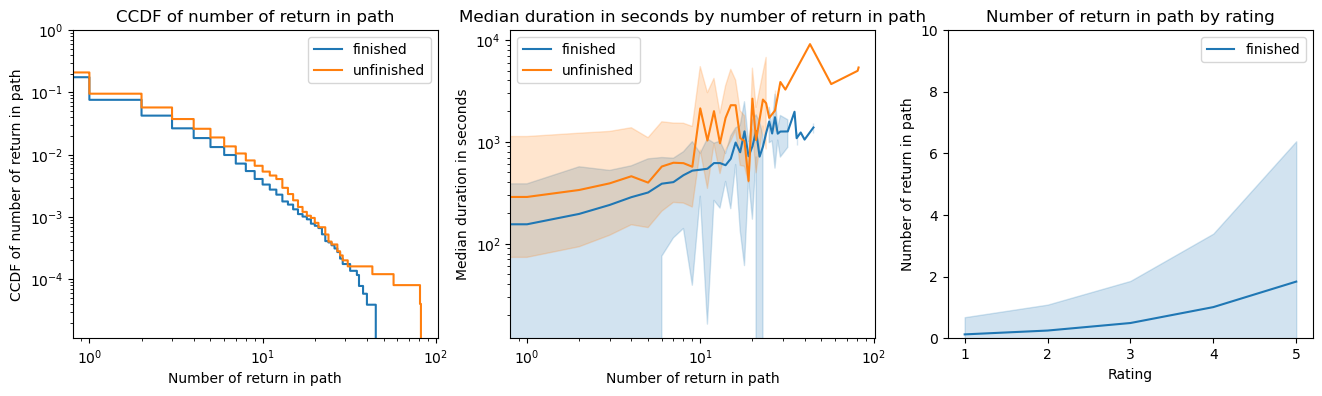

In [22]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))
sns.ecdfplot(
    paths_finished["backtrack"], label="finished", ax=axs[0], complementary=True
).set(
    xscale="log",
    yscale="log",
    ylabel="CCDF of number of return in path",
    xlabel="Number of return in path",
    title="CCDF of number of return in path",
)
sns.ecdfplot(
    paths_unfinished["backtrack"], label="unfinished", ax=axs[0], complementary=True
).set(
    xscale="log",
    yscale="log",
    ylabel="CCDF of number of return in path",
    xlabel="Number of return in path",
)
axs[0].legend()

sns.lineplot(
    paths_finished,
    x="backtrack",
    y="durationInSec",
    ax=axs[1],
    label="finished",
    errorbar="sd",
    estimator="median",
).set(
    xscale="log",
    yscale="log",
    ylabel="Median duration in seconds",
    xlabel="Number of return in path",
    title="Median duration in seconds by number of return in path",
)
sns.lineplot(
    paths_unfinished,
    x="backtrack",
    y="durationInSec",
    ax=axs[1],
    label="unfinished",
    errorbar="sd",
    estimator="median",
).set(xscale="log", yscale="log")
axs[1].legend()

sns.lineplot(
    paths_finished,
    x="rating",
    y="backtrack",
    ax=axs[2],
    label="finished",
    errorbar="sd",
).set(
    ylim=(0, 10),
    ylabel="Number of return in path",
    xlabel="Rating",
    title="Number of return in path by rating",
)
axs[2].legend()

In [36]:
paths_finished, paths_unfinished = f13.add_number_of_paths_previously_played(paths_finished, paths_unfinished)
paths_finished[paths_finished["numberOfPath"] == 500]["hashedIpAddress"]

23329    0d57c8c57d75e2f5
45468    473d6ac602c2b198
Name: hashedIpAddress, dtype: object

In [39]:
paths_finished[paths_finished["hashedIpAddress"]=="473d6ac602c2b198"][["timestamp","numberOfPath"]].sort_values(by="timestamp")

,timestamp,numberOfPath
27705,2011-08-29 20:56:58,1.0
14623,2011-08-29 20:58:34,2.0
27242,2011-08-29 21:05:41,3.0
10862,2011-08-29 21:10:31,4.0
48647,2011-08-29 21:12:39,5.0
...,...,...
44223,2014-01-15 21:26:52,633.0
9846,2014-01-15 21:32:30,634.0
51088,2014-01-15 21:34:47,635.0
20951,2014-01-15 21:35:29,636.0


In [40]:
paths_unfinished[paths_unfinished["hashedIpAddress"]=="473d6ac602c2b198"][["timestamp","numberOfPath"]].sort_values(by="timestamp")

,timestamp,numberOfPath
5574,2011-08-29 21:25:10,9.0
5576,2011-08-29 22:00:32,11.0
5587,2011-08-30 20:58:27,16.0
5588,2011-08-30 21:00:43,17.0
5589,2011-08-30 21:06:39,21.0
...,...,...
10554,2012-08-13 18:11:33,600.0
20352,2013-07-08 19:48:50,613.0
20983,2013-08-06 20:52:54,614.0
22572,2013-10-22 21:56:24,617.0


There are 2 ip addresses with more than 400 paths played, they will be excluded from the following plots


[(0.0, 100.0),
 [Text(15344.490752314814, 0, '2012-01-05'),
  Text(15376.9078125, 0, '2012-02-06')],
 Text(0.5, 1.0, 'evolution of the number of paths played before\n for multiple players (should only increase)'),
 Text(0.5, 0, 'timestamp'),
 Text(0, 0.5, 'number of paths')]

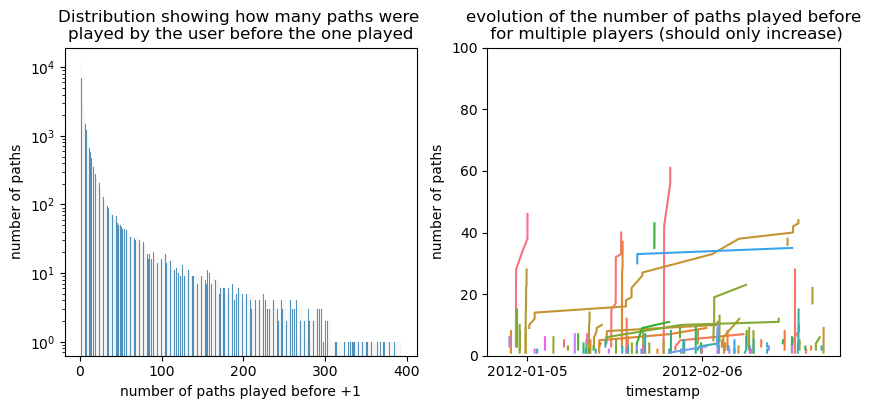

In [24]:
fig, axs = plt.subplots(figsize=(10, 4), nrows=1, ncols=2)

# how many users have more than 400 paths? (2)
print(
    "There are",
    len(paths_finished[paths_finished["numberOfPath"] == 401]["hashedIpAddress"]),
    "ip addresses with more than 400 paths played, they will be excluded from the following plots",
)
# we will exclude them for the following plots
paths_finished = paths_finished[
    ~paths_finished["hashedIpAddress"].isin(
        paths_finished[paths_finished["numberOfPath"] == 401]["hashedIpAddress"]
    )
]

# plot the distribution of the number of path
sns.histplot(data=paths_finished, x="numberOfPath", ax=axs[0]).set(
    yscale="log",
    title="Distribution showing how many paths were \nplayed by the user before the one played",
    xlabel="number of paths played before +1",
    ylabel="number of paths",
)
# check that the transformation is correct by looking if the number of path is increasing in function of the timestamp
# chose a sample of hashedIpAddress (we chosed randomly a 2 months window for better visualization)
sample = paths_finished.loc[
    (paths_finished["timestamp"] > "2012-01-01 00:00:00")
    & (paths_finished["timestamp"] < "2012-03-01 00:00:00")
]
sns.lineplot(
    data=sample,
    x="timestamp",
    y="numberOfPath",
    hue="hashedIpAddress",
    legend=False,
    ax=axs[1],
).set(
    ylim=(0, 100),
    xticks=[sample["timestamp"].iloc[0], sample["timestamp"].iloc[-1]],
    xticklabels=[
        sample["timestamp"].iloc[0].strftime("%Y-%m-%d"),
        sample["timestamp"].iloc[-1].strftime("%Y-%m-%d"),
    ],
    title="evolution of the number of paths played before\n for multiple players (should only increase)",
    xlabel="timestamp",
    ylabel="number of paths",
)

There are 0 ip addresses with more than 400 paths played, they will be excluded from the following plots


[(0.0, 100.0),
 [Text(15340.017939814816, 0, '2012-01-01'),
  Text(15399.844328703704, 0, '2012-02-29')],
 Text(0.5, 1.0, 'evolution of the number of paths played before\n for multiple players (should only increase)'),
 Text(0.5, 0, 'timestamp'),
 Text(0, 0.5, 'number of paths')]

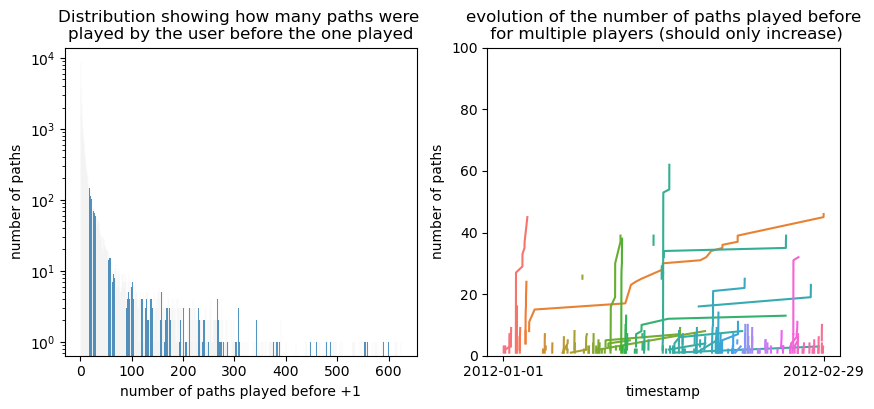

In [25]:
fig, axs = plt.subplots(figsize=(10, 4), nrows=1, ncols=2)

# how many users have more than 400 paths? (2)
print(
    "There are",
    len(paths_unfinished[paths_unfinished["numberOfPath"] == 401]["hashedIpAddress"]),
    "ip addresses with more than 400 paths played, they will be excluded from the following plots",
)
# we will exclude them for the following plots
paths_unfinished = paths_unfinished[
    ~paths_unfinished["hashedIpAddress"].isin(
        paths_unfinished[paths_unfinished["numberOfPath"] == 401]["hashedIpAddress"]
    )
]

# plot the distribution of the number of path
sns.histplot(data=paths_unfinished, x="numberOfPath", ax=axs[0]).set(
    yscale="log",
    title="Distribution showing how many paths were \nplayed by the user before the one played",
    xlabel="number of paths played before +1",
    ylabel="number of paths",
)
# check that the transformation is correct by looking if the number of path is increasing in function of the timestamp
# chose a sample of hashedIpAddress (we chosed randomly a 2 months window for better visualization)
sample = paths_unfinished.loc[
    (paths_unfinished["timestamp"] > "2012-01-01 00:00:00")
    & (paths_unfinished["timestamp"] < "2012-03-01 00:00:00")
]
sns.lineplot(
    data=sample,
    x="timestamp",
    y="numberOfPath",
    hue="hashedIpAddress",
    legend=False,
    ax=axs[1],
).set(
    ylim=(0, 100),
    xticks=[sample["timestamp"].iloc[0], sample["timestamp"].iloc[-1]],
    xticklabels=[
        sample["timestamp"].iloc[0].strftime("%Y-%m-%d"),
        sample["timestamp"].iloc[-1].strftime("%Y-%m-%d"),
    ],
    title="evolution of the number of paths played before\n for multiple players (should only increase)",
    xlabel="timestamp",
    ylabel="number of paths",
)